In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
#from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.signal import find_peaks
pd.options.plotting.backend = "plotly"
%matplotlib inline

In [ ]:
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
AZI_FILE = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/HP_450/Canopy 2x2 SM_Proto_1_0.000000_Azi_Cut.csv', sep= ',', header=0)

<IPython.core.display.Javascript object>

In [ ]:
DF_AZI_FILE = AZI_FILE[10:]
DF_AZI_FILE.columns = AZI_FILE.iloc[9]
DF_AZI_FILE = DF_AZI_FILE.reset_index(drop=True)
DF_AZI_FILE

<IPython.core.display.Javascript object>

9    Frequency Port ID   Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  HORIZONTAL         0         0      -180   
1          NaN       1  HORIZONTAL         0         0  -179.750   
2          NaN       1  HORIZONTAL         0         0  -179.500   
3          NaN       1  HORIZONTAL         0         0  -179.250   
4          NaN       1  HORIZONTAL         0         0      -179   
...        ...     ...         ...       ...       ...       ...   
2875       NaN       1  HORIZONTAL        90         0   178.750   
2876       NaN       1  HORIZONTAL        90         0       179   
2877       NaN       1  HORIZONTAL        90         0   179.250   
2878       NaN       1  HORIZONTAL        90         0   179.500   
2879       NaN       1  HORIZONTAL        90         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -17.287                -19.301                -20.337   
1                   -17.459                -19.480                -20.551   
2                   -17.570                -19.766                -21.058   
3                   -17.746                -19.934                -21.426   
4                   -18.009                -20.362                -21.867   
...                     ...                    ...                    ...   
2875                -23.904                -24.370                -24.390   
2876                -23.641                -23.998                -23.519   
2877                -23.193                -23.352                -22.626   
2878                -22.653                -23.005                -21.907   
2879                -22.028                -22.216                -21.129   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -25.794  ...                -16.450            -17.623   
1                   -26.168  ...                -16.523            -17.565   
2                   -26.706  ...                -16.557            -17.734   
3                   -27.326  ...                -16.702            -17.882   
4                   -27.870  ...                -16.905            -18.054   
...                     ...  ...                    ...                ...   
2875                -22.078  ...                -20.596            -18.955   
2876                -21.519  ...                -21.062            -19.350   
2877                -21.022  ...                -21.529            -19.826   
2878                -20.426  ...                -21.992            -20.326   
2879                -20.022  ...                -22.441            -20.906   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -20.057                -23.174                -28.043   
1                   -20.129                -23.432                -28.701   
2                   -20.339                -23.852                -29.729   
3                   -20.619                -24.517                -31.160   
4                   -21.056                -25.467                -32.798   
...                     ...                    ...                    ...   
2875                -19.084                -17.939                -18.944   
2876                -19.227                -18.134                -19.344   
2877                -19.391                -18.333                -19.709   
2878                -19.609                -18.588                -20.085   
2879                -19.871                -18.877                -20.487   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                   -24.498                -21.716                -18.658   
1                   -24.914                -22.046                -18.755   
2                   -25.425                -22.471                -19.066   
3                   -25.890                -22.972                -19.364   
4          

In [ ]:
DF_AZI_FILE = DF_AZI_FILE.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

<IPython.core.display.Javascript object>

In [ ]:
DF_AZI_FILE

<IPython.core.display.Javascript object>

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0            0      -180                -17.287                -19.301   
1            0  -179.750                -17.459                -19.480   
2            0  -179.500                -17.570                -19.766   
3            0  -179.250                -17.746                -19.934   
4            0      -179                -18.009                -20.362   
...        ...       ...                    ...                    ...   
2875        90   178.750                -23.904                -24.370   
2876        90       179                -23.641                -23.998   
2877        90   179.250                -23.193                -23.352   
2878        90   179.500                -22.653                -23.005   
2879        90   179.750                -22.028                -22.216   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -20.337                -25.794                -26.742   
1                   -20.551                -26.168                -26.928   
2                   -21.058                -26.706                -27.321   
3                   -21.426                -27.326                -27.828   
4                   -21.867                -27.870                -28.415   
...                     ...                    ...                    ...   
2875                -24.390                -22.078                -23.136   
2876                -23.519                -21.519                -22.539   
2877                -22.626                -21.022                -22.012   
2878                -21.907                -20.426                -21.282   
2879                -21.129                -20.022                -20.829   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -27.016                -26.236                -26.512   
1                   -26.986                -26.047                -26.508   
2                   -27.013                -25.671                -26.201   
3                   -27.155                -25.360                -25.765   
4                   -27.319                -25.095                -25.213   
...                     ...                    ...                    ...   
2875                -25.654                -25.347                -27.492   
2876                -24.718                -24.490                -25.976   
2877                -23.855                -23.705                -24.751   
2878                -23.025                -22.988                -23.559   
2879                -22.222                -22.362                -22.747   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -16.450            -17.623                -20.057   
1     ...                -16.523            -17.565                -20.129   
2     ...                -16.557            -17.734                -20.339   
3     ...                -16.702            -17.882                -20.619   
4     ...                -16.905            -18.054                -21.056   
...   ...                    ...                ...                    ...   
2875  ...                -20.596            -18.955                -19.084   
2876  ...                -21.062            -19.350                -19.227   
2877  ...                -21.529            -19.826                -19.391   
2878  ...                -21.992            -20.326                -19.609   
2879  ...                -22.441            -20.906                -19.871   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -23.174                -28.043                -24.498   
1                   -23.432                -28.701                -24.914   
2                   -23.852                -29.729                -25.425   
3               

In [ ]:
DF_AZI_FILE = DF_AZI_FILE.astype('float64')

<IPython.core.display.Javascript object>

In [ ]:
DF_AZI_FILE.dtypes

<IPython.core.display.Javascript object>

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.125 GHz    float64
Gain in dB @ 5.150 GHz    float64
                           ...   
Gain in dB @ 7.100 GHz    float64
Gain in dB @ 7.125 GHz    float64
Gain in dB @ 7.150 GHz    float64
Gain in dB @ 7.175 GHz    float64
Gain in dB @ 7.200 GHz    float64
Length: 87, dtype: object

In [ ]:
DF_AZI_FILE.shape

<IPython.core.display.Javascript object>

(2880, 87)

In [ ]:
# rows = 2880
# cols = 85
# array = np.zeros((rows, cols))

<IPython.core.display.Javascript object>

In [ ]:
column_index = 2
array = DF_AZI_FILE.iloc[:, column_index].to_numpy()

<IPython.core.display.Javascript object>

In [ ]:
array

<IPython.core.display.Javascript object>

array([-17.287, -17.459, -17.57 , ..., -23.193, -22.653, -22.028])

In [ ]:
# import numpy as np
# from scipy.signal import find_peaks
# import matplotlib.pyplot as plt

# # Sample 1D data
# data = np.array([0, 2, 1, 3, 7, 1, 2, 6, 0, 1, 4, 1, 0])

# # Find peaks
# peaks, _ = find_peaks(data)

# # Print the indices of the peaks
# print("Indices of peaks:", peaks)

# # Store the peak values in an array
# peak_values = data[peaks]
# print("Values of peaks:", peak_values)

# # Plot the data and the peaks
# plt.plot(data, label='Data')
# plt.plot(peaks, data[peaks], 'x', label='Peaks')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


<IPython.core.display.Javascript object>

In [ ]:
peaks, _ = find_peaks(array)
peak_values = array[peaks]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

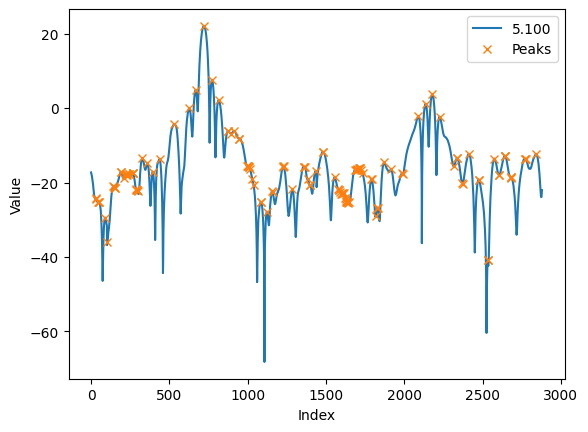

In [ ]:
plt.plot(array, label='5.100')
plt.plot(peaks, array[peaks], 'x', label='Peaks')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<Axes: xlabel='Scan Axis', ylabel='Gain in dB @ 5.100 GHz'>

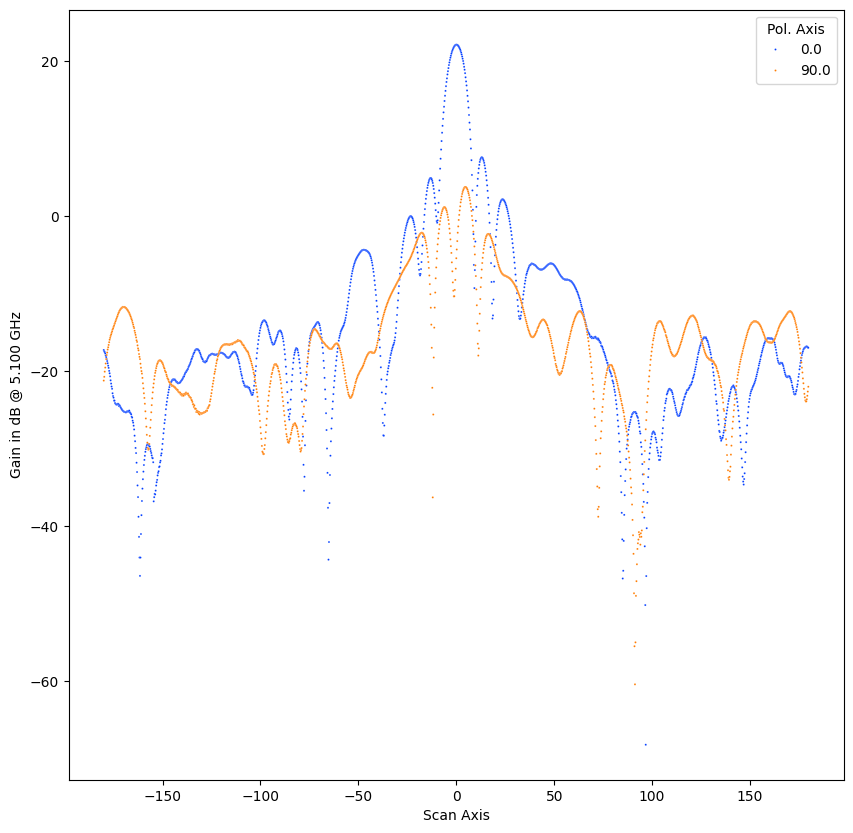

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=DF_AZI_FILE,x = DF_AZI_FILE['Scan Axis'], y = DF_AZI_FILE.iloc[:,2],s=2, hue='Pol. Axis', palette='bright')

<IPython.core.display.Javascript object>

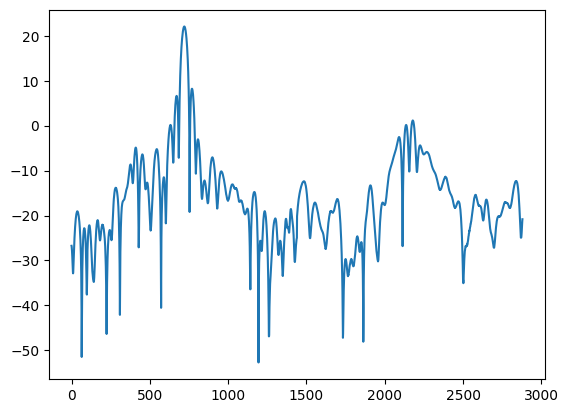

In [ ]:
plt.plot(DF_AZI_FILE.iloc[:,6])

In [ ]:
peaks

<IPython.core.display.Javascript object>

array([  29,   32,   47,   50,   52,   90,  104,  142,  145,  150,  153,
        189,  191,  209,  222,  224,  226,  228,  239,  241,  265,  267,
        269,  288,  290,  293,  295,  297,  327,  360,  393,  437,  531,
        627,  667,  720,  772,  815,  874,  876,  893,  913,  944,  947,
        996,  999, 1004, 1008, 1010, 1014, 1029, 1038, 1083, 1086, 1123,
       1156, 1159, 1226, 1228, 1230, 1286, 1357, 1361, 1364, 1383, 1398,
       1400, 1436, 1479, 1482, 1555, 1577, 1581, 1586, 1591, 1598, 1601,
       1605, 1608, 1612, 1623, 1625, 1627, 1630, 1633, 1635, 1639, 1650,
       1688, 1691, 1695, 1698, 1701, 1708, 1711, 1714, 1718, 1724, 1734,
       1790, 1792, 1817, 1827, 1830, 1871, 1917, 1986, 1989, 2090, 2136,
       2179, 2225, 2315, 2336, 2338, 2370, 2372, 2412, 2474, 2476, 2533,
       2537, 2575, 2602, 2606, 2640, 2642, 2644, 2678, 2682, 2684, 2769,
       2771, 2776, 2841])

In [ ]:
peak_values

<IPython.core.display.Javascript object>

array([-2.4220e+01, -2.4391e+01, -2.5224e+01, -2.5190e+01, -2.5098e+01,
       -2.9436e+01, -3.5847e+01, -2.1051e+01, -2.1080e+01, -2.1433e+01,
       -2.1539e+01, -1.7177e+01, -1.7185e+01, -1.8695e+01, -1.7774e+01,
       -1.7820e+01, -1.7856e+01, -1.7899e+01, -1.7622e+01, -1.7655e+01,
       -1.7549e+01, -1.7497e+01, -1.7549e+01, -2.1857e+01, -2.1999e+01,
       -2.2000e+01, -2.2078e+01, -2.2166e+01, -1.3479e+01, -1.4765e+01,
       -1.7053e+01, -1.3699e+01, -4.3640e+00, -3.7000e-02,  4.8770e+00,
        2.2080e+01,  7.5610e+00,  2.1320e+00, -6.1260e+00, -6.1710e+00,
       -6.9150e+00, -6.1220e+00, -8.2030e+00, -8.1950e+00, -1.5561e+01,
       -1.5674e+01, -1.5578e+01, -1.5800e+01, -1.5809e+01, -1.6258e+01,
       -1.8946e+01, -2.0661e+01, -2.5278e+01, -2.5300e+01, -2.7800e+01,
       -2.2294e+01, -2.2456e+01, -1.5649e+01, -1.5692e+01, -1.5655e+01,
       -2.1857e+01, -1.5767e+01, -1.5794e+01, -1.5789e+01, -1.8930e+01,
       -2.0696e+01, -2.0678e+01, -1.6833e+01, -1.1728e+01, -1.17

In [ ]:
peak_values.dtype

<IPython.core.display.Javascript object>

dtype('float64')

In [ ]:
peak_values = -np.sort(-peak_values)   #https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order

<IPython.core.display.Javascript object>

In [ ]:
peak_values

<IPython.core.display.Javascript object>

array([ 2.2080e+01,  7.5610e+00,  4.8770e+00,  3.7390e+00,  2.1320e+00,
        1.1330e+00, -3.7000e-02, -2.1670e+00, -2.3230e+00, -4.3640e+00,
       -6.1220e+00, -6.1260e+00, -6.1710e+00, -6.9150e+00, -8.1950e+00,
       -8.2030e+00, -1.1728e+01, -1.1733e+01, -1.2275e+01, -1.2294e+01,
       -1.2846e+01, -1.2857e+01, -1.2887e+01, -1.3359e+01, -1.3388e+01,
       -1.3479e+01, -1.3572e+01, -1.3575e+01, -1.3596e+01, -1.3699e+01,
       -1.3719e+01, -1.4595e+01, -1.4765e+01, -1.5561e+01, -1.5577e+01,
       -1.5578e+01, -1.5649e+01, -1.5655e+01, -1.5674e+01, -1.5692e+01,
       -1.5767e+01, -1.5789e+01, -1.5794e+01, -1.5800e+01, -1.5809e+01,
       -1.5999e+01, -1.6088e+01, -1.6166e+01, -1.6258e+01, -1.6273e+01,
       -1.6460e+01, -1.6471e+01, -1.6517e+01, -1.6528e+01, -1.6552e+01,
       -1.6572e+01, -1.6582e+01, -1.6833e+01, -1.7053e+01, -1.7177e+01,
       -1.7185e+01, -1.7470e+01, -1.7497e+01, -1.7522e+01, -1.7549e+01,
       -1.7549e+01, -1.7612e+01, -1.7622e+01, -1.7655e+01, -1.77

In [ ]:
peak_values[0] - peak_values[1]

<IPython.core.display.Javascript object>

14.518999999999998

In [ ]:
SLL = np.zeros(85)
i=2
while i<87:
  column_index = i
  array = DF_AZI_FILE.iloc[:, column_index].to_numpy()
  peaks, _ = find_peaks(array)
  peak_values = array[peaks]
  peak_values = -np.sort(-peak_values)
  SLL[i-2] = peak_values[0] - peak_values[1]
  i += 1
SLL

<IPython.core.display.Javascript object>

array([14.519, 14.681, 14.457, 14.161, 13.863, 13.73 , 13.786, 13.873,
       13.953, 13.979, 13.867, 13.773, 13.525, 13.27 , 13.164, 13.048,
       13.14 , 13.294, 13.519, 13.691, 13.853, 14.201, 14.563, 15.012,
       15.222, 15.413, 15.781, 16.136, 16.59 , 16.844, 17.03 , 17.108,
       16.563, 16.373, 16.045, 15.451, 15.335, 14.653, 14.106, 13.762,
       13.096, 12.649, 12.137, 11.707, 11.535, 11.356, 11.601, 11.853,
       12.1  , 12.363, 12.227, 12.205, 12.14 , 11.952, 11.846, 11.705,
       11.75 , 11.831, 11.969, 12.177, 12.266, 12.352, 12.386, 12.317,
       12.245, 12.126, 11.98 , 11.855, 11.712, 11.542, 11.399, 11.265,
       11.159, 11.069, 11.021, 10.932, 10.817, 10.641, 10.478, 10.369,
       10.273, 10.248, 10.245, 10.304, 10.498])

In [ ]:
SLL.shape

<IPython.core.display.Javascript object>

(85,)

In [ ]:
index_SLL = DF_AZI_FILE.index[2:87]

<IPython.core.display.Javascript object>

In [ ]:
index_SLL

<IPython.core.display.Javascript object>

RangeIndex(start=2, stop=87, step=1)

In [ ]:
df2 = pd.DataFrame({
    'SLL': SLL,
})
df2

<IPython.core.display.Javascript object>

SLL
0   14.519
1   14.681
2   14.457
3   14.161
4   13.863
..     ...
80  10.273
81  10.248
82  10.245
83  10.304
84  10.498

[85 rows x 1 columns]

In [ ]:
Gain = DF_AZI_FILE.max()
Gain

<IPython.core.display.Javascript object>

9
Pol. Axis                  90.000
Scan Axis                 179.750
Gain in dB @ 5.100 GHz     22.080
Gain in dB @ 5.125 GHz     22.444
Gain in dB @ 5.150 GHz     22.300
                           ...   
Gain in dB @ 7.100 GHz     24.480
Gain in dB @ 7.125 GHz     24.797
Gain in dB @ 7.150 GHz     24.533
Gain in dB @ 7.175 GHz     24.311
Gain in dB @ 7.200 GHz     24.161
Length: 87, dtype: float64

In [ ]:
Gain.plot(template = 'plotly_dark')

<IPython.core.display.Javascript object>

In [ ]:
Gain = Gain.drop(index=Gain.index[0:2], axis=0)

<IPython.core.display.Javascript object>

In [ ]:
df2.index = Gain.index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-35-7240d5acb7ab>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-35-7240d5acb7ab>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Gain in dB @ 5.100 GHz'),
 Text(1, 0, 'Gain in dB @ 5.125 GHz'),
 Text(2, 0, 'Gain in dB @ 5.150 GHz'),
 Text(3, 0, 'Gain in dB @ 5.175 GHz'),
 Text(4, 0, 'Gain in dB @ 5.200 GHz'),
 Text(5, 0, 'Gain in dB @ 5.225 GHz'),
 Text(6, 0, 'Gain in dB @ 5.250 GHz'),
 Text(7, 0, 'Gain in dB @ 5.275 GHz'),
 Text(8, 0, 'Gain in dB @ 5.300 GHz'),
 Text(9, 0, 'Gain in dB @ 5.325 GHz'),
 Text(10, 0, 'Gain in dB @ 5.350 GHz'),
 Text(11, 0, 'Gain in dB @ 5.375 GHz'),
 Text(12, 0, 'Gain in dB @ 5.400 GHz'),
 Text(13, 0, 'Gain in dB @ 5.425 GHz'),
 Text(14, 0, 'Gain in dB @ 5.450 GHz'),
 Text(15, 0, 'Gain in dB @ 5.475 GHz'),
 Text(16, 0, 'Gain in dB @ 5.500 GHz'),
 Text(17, 0, 'Gain in dB @ 5.525 GHz'),
 Text(18, 0, 'Gain in dB @ 5.550 GHz'),
 Text(19, 0, 'Gain in dB @ 5.575 GHz'),
 Text(20, 0, 'Gain in dB @ 5.600 GHz'),
 Text(21, 0, 'Gain in dB @ 5.625 GHz'),
 Text(22, 0, 'Gain in dB @ 5.650 GHz'),
 Text(23, 0, 'Gain in dB @ 5.675 GHz'),
 Text(24, 0, 'Gain in dB @ 5.700 GHz'),
 Text(25, 

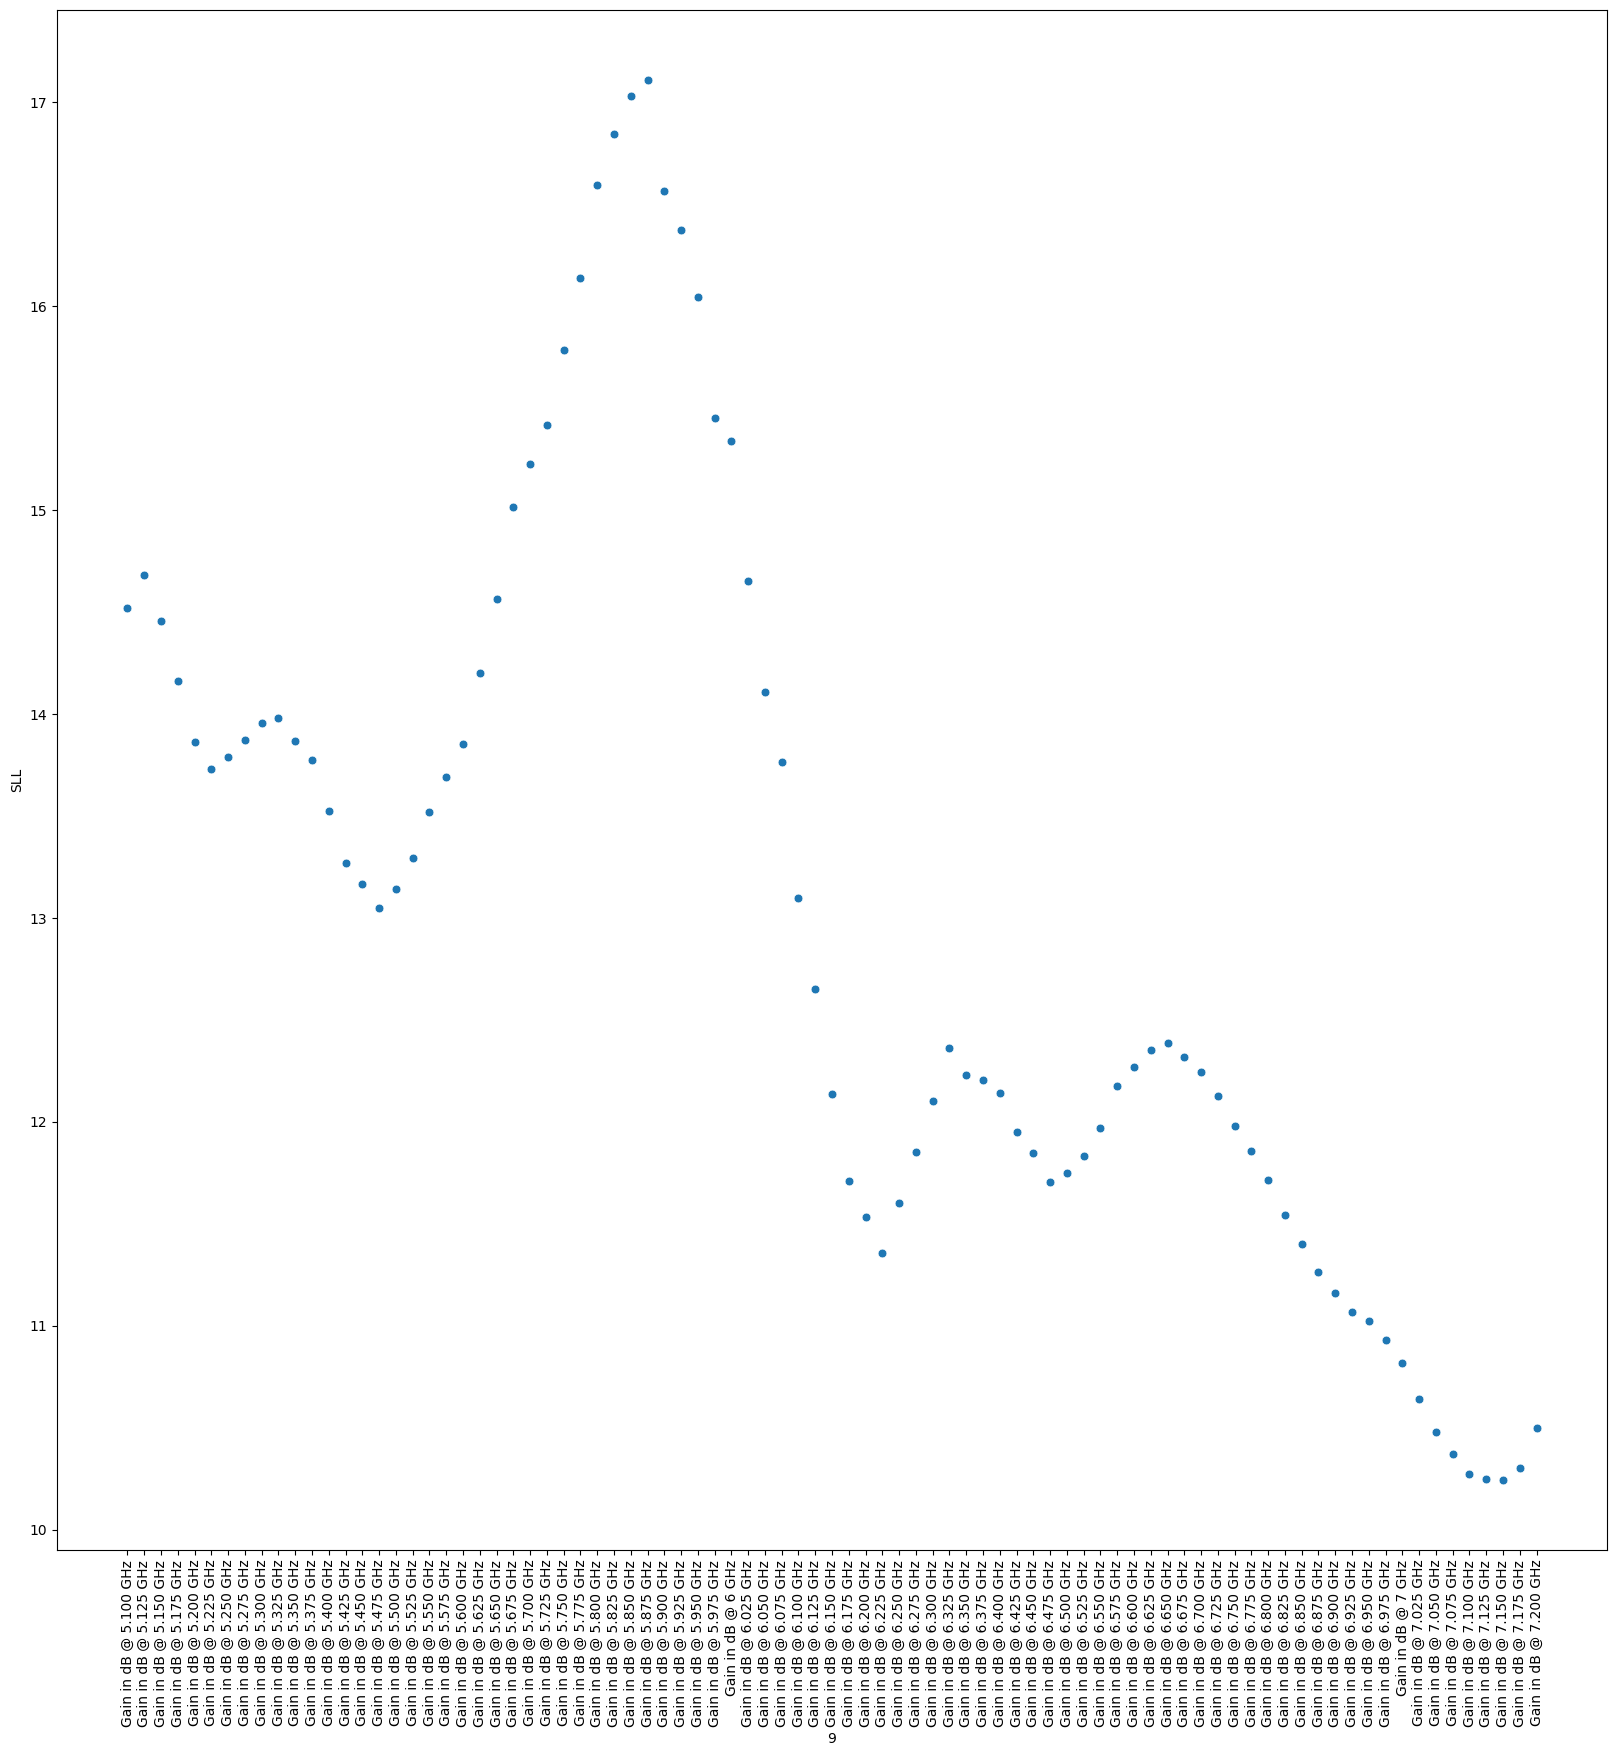

In [ ]:
plt.figure(figsize=(20,20))
my_plot = sns.scatterplot(data=df2,x = df2.index, y = df2.iloc[:,0],s=40, palette='bright')
# my_plot.get_xticklabels(),
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [ ]:
fig = px.scatter(df2, x = df2.index, y = df2.iloc[:,0], template='plotly_dark')
# fig = px.scatter(df2, x = df2.index, y = df2.iloc[:,0], color =df2.index, color_continuous_scale='bluered')

fig.update_layout(
    width=2000,  # Set the width of the plot
    height=1300   # Set the height of the plot
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.line(df2, x = df2.index, y = df2.iloc[:,0], template='plotly_dark', markers = 'true')
# fig = px.scatter(df2, x = df2.index, y = df2.iloc[:,0], color =df2.index, color_continuous_scale='bluered'), color = df2.index

fig.update_layout(
    width=2000,  # Set the width of the plot
    height=1300   # Set the height of the plot
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.scatter(DF_AZI_FILE, x = DF_AZI_FILE['Scan Axis'], y = DF_AZI_FILE.iloc[:,2], color = 'Pol. Axis', color_continuous_scale='bluered', template='plotly_dark')

fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000,   # Set the height of the plot
    showlegend=False
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.line(df2, x = df2.index, y = df2.iloc[:,0], template='plotly_dark')
# fig = px.scatter(df2, x = df2.index, y = df2.iloc[:,0], color =df2.index, color_continuous_scale='bluered')

fig.update_layout(
    width=2000,  # Set the width of the plot
    height=1300   # Set the height of the plot
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.scatter(DF_AZI_FILE, x = DF_AZI_FILE.iloc[:1440,1], y = DF_AZI_FILE.iloc[:1440,2])
#  color = 'Pol. Axis', color_continuous_scale='bluered' , template='plotly_dark

fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000,   # Set the height of the plot
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.line(DF_AZI_FILE, x = DF_AZI_FILE.iloc[:1440,1], y = DF_AZI_FILE.iloc[:1440,2], markers='true')
#  color = 'Pol. Axis', color_continuous_scale='bluered' , template='plotly_dark

fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000,   # Set the height of the plot
)


fig.show()

<IPython.core.display.Javascript object>

In [ ]:
fig = px.line(DF_AZI_FILE, x = DF_AZI_FILE.iloc[:1440,1], y = DF_AZI_FILE.iloc[:1440,2], markers='true')
#  color = 'Pol. Axis', color_continuous_scale='bluered' , template='plotly_dark

fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000,   # Set the height of the plot
)


fig.show()

In [ ]:
df2.to_csv('SLL.csv', index=True)

<IPython.core.display.Javascript object>